Assignment 3 (due on 11/22)

Student:黄筱雯（12332269），Gtihub：VivianH1203

批改人：赵淑慧

得分：45/60

In [29]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.io.shapereader import Reader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER,LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import math
from scipy import stats
%matplotlib inline

In [2]:
def gridline(ax, data, str1, str2, fontsize, lw):
# --设置网格点属性
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
        linewidth=lw, color='k', alpha=0.5, linestyle='--')
    gl.top_labels = False  # 关闭顶端的经纬度标签
    gl.right_labels = False  # 关闭右侧的经纬度标签
    gl.xformatter = LONGITUDE_FORMATTER  # x轴设为经度的格式
    gl.yformatter = LATITUDE_FORMATTER  # y轴设为纬度的格式

    maxlong = math.ceil(max(np.unique(data.coords[str1].values)))
    minlong = int(min(np.unique(data.coords[str1].values)))
    maxlat = math.ceil(max(np.unique(data.coords[str2].values)))
    minlat = int(min(np.unique(data.coords[str2].values)))
    gl.xlocator = mticker.FixedLocator(np.arange(-180, 181, 30))
    gl.ylocator = mticker.FixedLocator(np.arange(-90, 91, 30))
    gl.xlabel_style = {'size': fontsize, 'family':'Arial'}
    gl.ylabel_style = {'size': fontsize, 'family': 'Arial'}

In [3]:
world = cfeat.ShapelyFeature(Reader(r'C:\Program1\jupyter_notebook\ese5023\ESE5023_Assignments_12232269\2022世界国家\2022世界国家.shp').geometries(),
                                 ccrs.PlateCarree(), edgecolor='k', facecolor='none',lw=2)

# PS1. Niño 3.4 index
16/20  
1. Niño 3.4范围正确，计算月度气候态（多年平均每月）的SST，并获取SST距平。10/10
2. 根据厄尔尼诺和拉尼娜事件定义，模仿例图（x轴月尺度时间，y轴温度距平，黑线表示三个月滑动平均的距平值，红柱表示正距平，蓝柱表示负距平，有两种事件的阈值水平线）进行绘图。——缺少图名、图例、横纵坐标名、阈值线、变量单位。6/10

In [4]:
ds1 = xr.open_dataset(r"C:\Program1\jupyter_notebook\ese5023\NOAA_NCDC_ERSST_v3b_SST.nc")
ds1

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

## 1.1

In [5]:
#select the region
ds1_Nino = ds1.sel(lat=slice(-5,5),lon=slice(190,240))
ds1_mean = ds1_Nino['sst'].mean(('lon','lat'))
#compute monthly SST climatology
ds1_clim_mm = ds1_mean.groupby(ds1.time.dt.month).mean()

In [6]:
#compute anomalies
ds1_ano = xr.zeros_like(ds1_mean)
for i in range(0,len(ds1_mean)):
    k = i % 12
    ds1_ano[i] = ds1_mean.values[i] - ds1_clim_mm.values[k]

## 1.2

In [7]:
#3-month running mean
index = np.zeros_like(ds1_ano[2:684])
for ii in range(0,len(index)):
    index[ii] = ds1_ano[ii:ii+3].values.mean()

(0.0, 682.0)

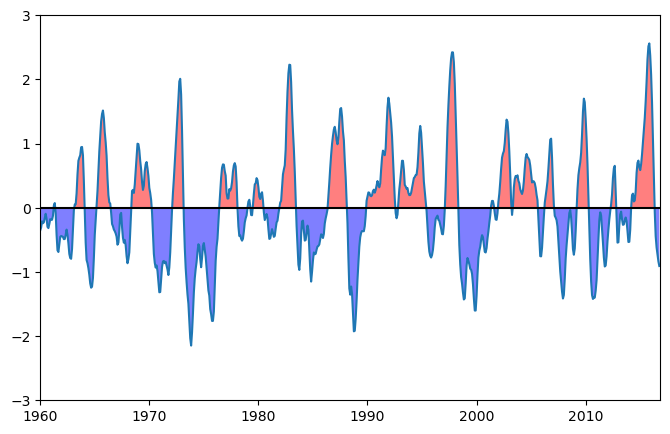

In [8]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(len(index)),index)
plt.plot(np.arange(len(index)),np.zeros_like(index),c='k')
plt.xticks(np.arange(0,len(index),120),np.arange(1960,2015,10))
plt.fill_between(np.arange(0,len(index)),0,index,where=index > 0,
                 fc='r',alpha=0.5)
plt.fill_between(np.arange(0,len(index)),index,0,where=index < 0,
                 fc='b',alpha=0.5)
plt.ylim(-3,3)
plt.xlim(0,len(index))

# PS2. Earth’s energy budget
20/30  
1. 绘制按时间平均的全天况下的TOA长波、短波、太阳辐射的2D图，将三者加和并可视化确认他们的和与TOA净通量相等。——画的不是2D图，见参考代码。2/5
2. 计算并确认TOA入射太阳辐射、出射长波、出射短波与示例图中的信息相符合，注意计算每个格网的实际面积。10/10
3. 计算并绘制每1度纬度带上的净辐射总量，注意正确的单位。——题目的要求不是按时间求和而是按纬度带求和，且应将辐射量乘上面积，得到结果单位为W，见参考代码。2/5
4. 计算并绘制低云区和高云区的按时间平均的出射短波和长波辐射的2D合成图。注意低云区和高云区的定义。——云覆盖情况与辐射量是一一对应的，故应先筛选低云或高云区再按时间平均。3/5
5. 计算在高云区和低云区合成的短波和长波辐射的总体平均值，并回答云层对短波和长波辐射的总体影响是怎样的？——2.4的计算思路错误导致2.5的结论有误，见参考代码。3/5

In [9]:
ds2 = xr.open_dataset(r"C:\Program1\jupyter_notebook\ese5023\CERES_EBAF-TOA_200003-201701.nc")
ds2

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

## 2.1

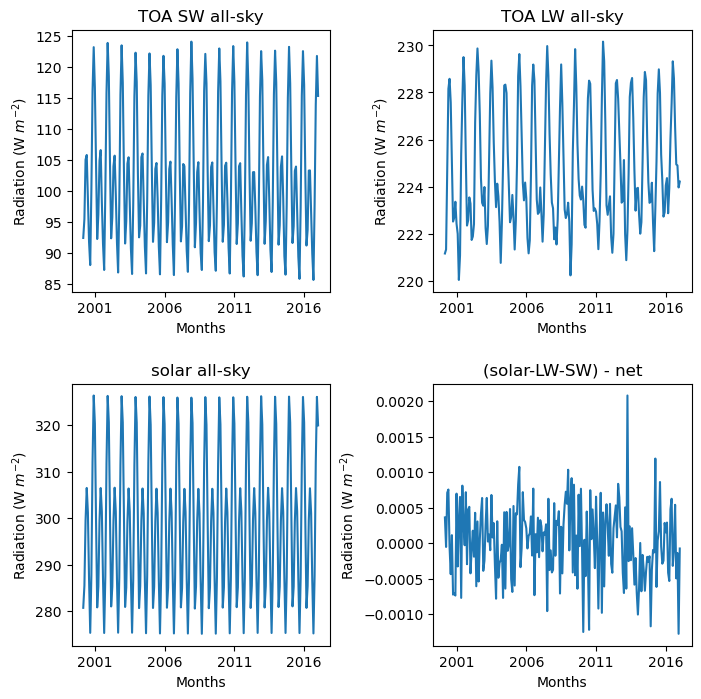

In [10]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(221)
ax1.plot(ds2['toa_sw_all_mon'].mean(('lon','lat')))
ax1.set(title='TOA SW all-sky',xlabel='Months',ylabel='Radiation (W $m^{-2}$)')
ax1.set_xticks(np.arange(10,203,60))
ax1.set_xticklabels(np.arange(2001,2017,5))

ax2 = fig.add_subplot(222)
ax2.plot(ds2['toa_lw_all_mon'].mean(('lon','lat')))
ax2.set(title='TOA LW all-sky',xlabel='Months',ylabel='Radiation (W $m^{-2}$)')
ax2.set_xticks(np.arange(10,203,60))
ax2.set_xticklabels(np.arange(2001,2017,5))

ax3 = fig.add_subplot(223)
ax3.plot(ds2['solar_mon'].mean(('lon','lat')))
ax3.set(title='solar all-sky',xlabel='Months',ylabel='Radiation (W $m^{-2}$)')
ax3.set_xticks(np.arange(10,203,60))
ax3.set_xticklabels(np.arange(2001,2017,5))

rad_sum = ds2['solar_mon'] - ds2['toa_sw_all_mon'] - ds2['toa_lw_all_mon']  - ds2['toa_net_all_mon']
ax4 = fig.add_subplot(224)
ax4.plot(rad_sum.mean(('lon','lat')))
ax4.set(title='(solar-LW-SW) - net',xlabel='Months',ylabel='Radiation (W $m^{-2}$)')
ax4.set_xticks(np.arange(10,203,60))
ax4.set_xticklabels(np.arange(2001,2017,5))
plt.subplots_adjust(hspace=0.35,wspace=0.4)

Since the difference between (solar-LW-SW) and net radiation is quite small, the three variables are equivalent to TOA net flux

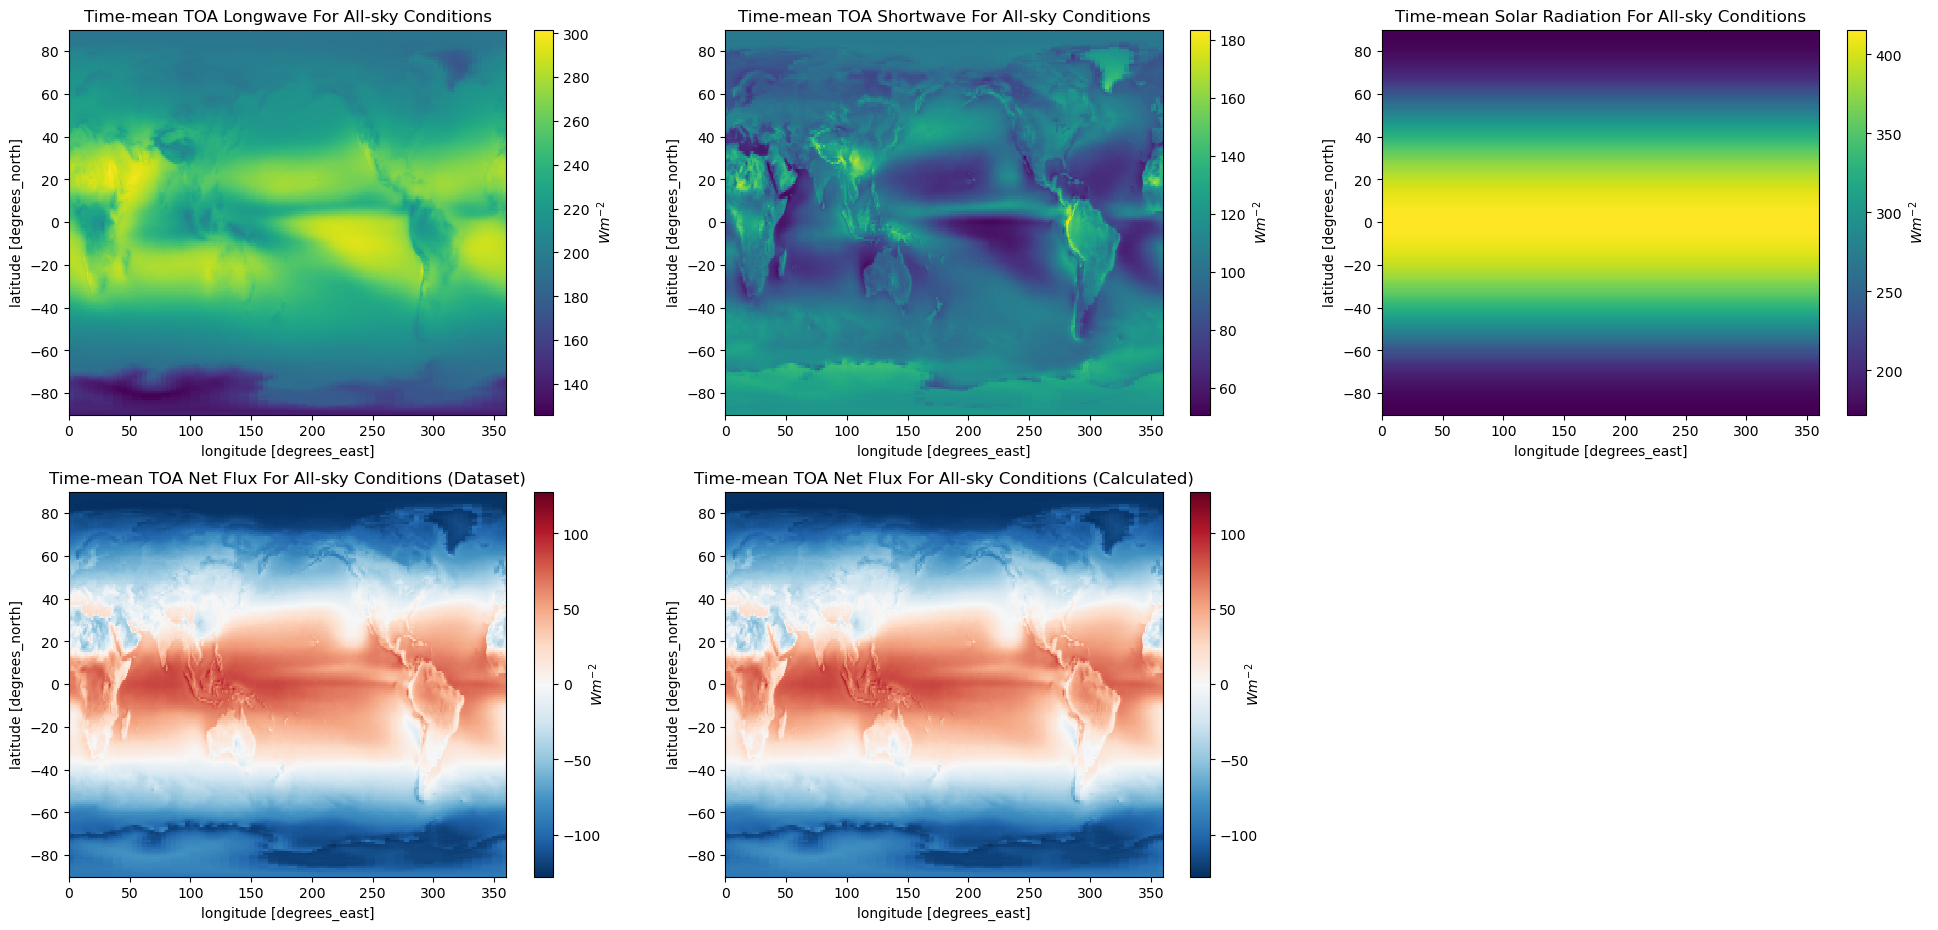

In [13]:
# 参考代码
toa_sw=ds2.toa_sw_all_mon.mean(dim='time')
toa_lw=ds2.toa_lw_all_mon.mean(dim='time')
toa_net=ds2.toa_net_all_mon.mean(dim='time')
solar_rad=ds2.solar_mon.mean(dim='time')
toa_net1=solar_rad-toa_lw-toa_sw

fig,axs =plt.subplots(2,3,figsize=(24,11))
axs=axs.flatten()

fig1=toa_lw.plot(ax=axs[0],cbar_kwargs={'label':'${Wm^{-2}}$'})
# cb=plt.colorbar(fig1)
# cb.set_label('${Wm^{-2}}$')
axs[0].set_title('Time-mean TOA Longwave For All-sky Conditions')

fig2=toa_sw.plot(ax=axs[1],add_colorbar=False)
cb=plt.colorbar(fig2)
cb.set_label('${Wm^{-2}}$')
axs[1].set_title('Time-mean TOA Shortwave For All-sky Conditions')

fig3=solar_rad.plot(ax=axs[2],cbar_kwargs={'label':'${Wm^{-2}}$'})
# cb=plt.colorbar(fig3)
# cb.set_label('${Wm^{-2}}$')
axs[2].set_title('Time-mean Solar Radiation For All-sky Conditions')

fig4=toa_net.plot(ax=axs[3],add_colorbar=False)
cb=plt.colorbar(fig4)
cb.set_label('${Wm^{-2}}$',labelpad=-10)
axs[3].set_title('Time-mean TOA Net Flux For All-sky Conditions (Dataset)')

fig5=toa_net1.plot(ax=axs[4],add_colorbar=False)
cb=plt.colorbar(fig5)
cb.set_label('${Wm^{-2}}$',labelpad=-10)
axs[4].set_title('Time-mean TOA Net Flux For All-sky Conditions (Calculated)')

axs[5].set_axis_off()
plt.show()

## 2.2

In [11]:
weights = np.cos(np.deg2rad(ds2.lat))
weights.name = "weights"
#select the 10-year data just as the cartoon
print(ds2['solar_mon'].sel(time=slice('2001','2010')).weighted(weights).mean(('lon','lat')).mean())
print(ds2['toa_sw_all_mon'].sel(time=slice('2001','2010')).weighted(weights).mean(('lon','lat')).mean())
print(ds2['toa_lw_all_mon'].sel(time=slice('2001','2010')).weighted(weights).mean(('lon','lat')).mean())

<xarray.DataArray 'solar_mon' ()>
array(340.29135, dtype=float32)
<xarray.DataArray 'toa_sw_all_mon' ()>
array(99.27172, dtype=float32)
<xarray.DataArray 'toa_lw_all_mon' ()>
array(240.24297, dtype=float32)


The values of solar_mon matches the incoming solar radiation in the cartoon.  
The values of toa_sw_all_mon matches the total reflected solar radiation in the cartoon.  
The values of toa_lw_all_mon matchs the total outgoing infrared radiation in the cartoon.

## 2.3

([<matplotlib.axis.XTick at 0x16440e2d690>,
 [Text(-75, 0, '-75$^{\\circ}$'),
  Text(-50, 0, '-50$^{\\circ}$'),
  Text(-25, 0, '-25$^{\\circ}$'),
  Text(0, 0, '0$^{\\circ}$'),
  Text(25, 0, '25$^{\\circ}$'),
  Text(50, 0, '50$^{\\circ}$'),
  Text(75, 0, '75$^{\\circ}$')])

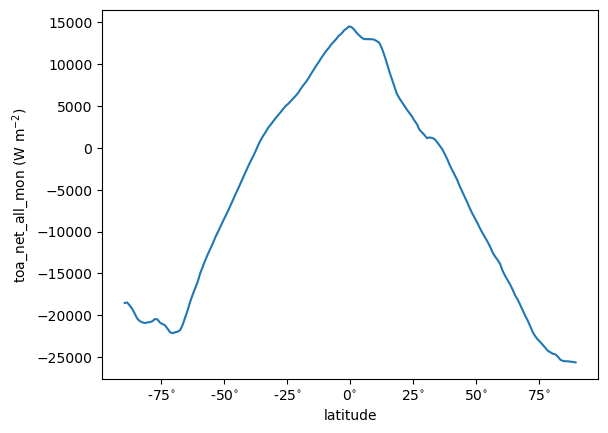

In [12]:
#total amount for whole period
time_tot = ds2['toa_net_all_mon'].sum(dim='time')
lat_mean = time_tot.mean(axis=1)
lat_mean.plot()
plt.ylabel('toa_net_all_mon (W m$^{-2}$)')
plt.xlabel('latitude')
plt.xticks([-75,-50,-25,0,25,50,75],['-75$^{\circ}$','-50$^{\circ}$','-25$^{\circ}$','0$^{\circ}$','25$^{\circ}$','50$^{\circ}$','75$^{\circ}$'])

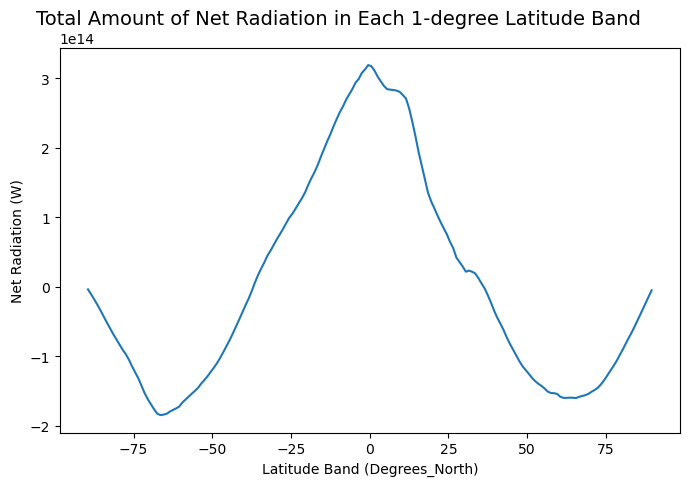

In [14]:
# 参考代码
"""
Area calculations: https://seaflux.readthedocs.io/en/stable/_modules/pyseaflux/area.html
-----------------
Calculates the area of pixels for a give grid input.
"""
def earth_radius(lat):
    """Calculate the radius of the earth for a given latitude

    Args:
        lat (array, float): latitude value (-90 : 90)

    Returns:
        array: radius in metres
    """
    from numpy import cos, deg2rad, sin

    lat = deg2rad(lat)
    a = 6378137
    b = 6356752
    r = (
        ((a ** 2 * cos(lat)) ** 2 + (b ** 2 * sin(lat)) ** 2)
        / ((a * cos(lat)) ** 2 + (b * sin(lat)) ** 2)
    ) ** 0.5

    return r
def area_grid(lat, lon, return_dataarray=False):
    """Calculate the area of each grid cell for given lats and lons

    Args:
        lat (array): latitudes in decimal degrees of length N
        lon (array): longitudes in decimal degrees of length M
        return_dataarray (bool, optional): if True returns xr.DataArray, else array

    Returns:
        array, xr.DataArray: area of each grid cell in meters

    References:
        https://github.com/chadagreene/CDT/blob/master/cdt/cdtarea.m
    """
    from numpy import cos, deg2rad, gradient, meshgrid

    ylat, xlon = meshgrid(lat, lon)
    R = earth_radius(ylat)

    dlat = deg2rad(gradient(ylat, axis=1))
    dlon = deg2rad(gradient(xlon, axis=0))

    dy = dlat * R
    dx = dlon * R * cos(deg2rad(ylat))

    area = dy * dx

    if not return_dataarray:
        return area
    else:
        from xarray import DataArray

        xda = DataArray(
            area.T,
            dims=["lat", "lon"],
            coords={"lat": lat, "lon": lon},
            attrs=dict(
                long_name="Area per pixel",
                units="m^2",
                description=(
                    "Area per pixel as calculated by pySeaFlux. The non-"
                    "spherical shape of Earth is taken into account."
                ),
            ),
        )

        return xda
def get_area_from_dataset(dataarray, lat_name="lat", lon_name="lon"):
    """
    Calculate the grid cell area from a xr.Dataset or xr.DataArray.
    """
    da = dataarray
    x = da.lon.values
    y = da.lat.values

    area = area_grid(y, x, return_dataarray=True)

    return area
area=get_area_from_dataset(toa_net)
net_rad_lat_band=(toa_net*area).sum(dim='lon')
plt.figure(111,figsize=(8,5))
plt.plot(net_rad_lat_band.lat,net_rad_lat_band)
plt.xlabel('Latitude Band (Degrees_North)')
plt.ylabel('Net Radiation (W)')
plt.title('Total Amount of Net Radiation in Each 1-degree Latitude Band',x=0.45,fontsize=14)
plt.show()

## 2.4

In [15]:
mean_og_sw = ds2['toa_sw_all_mon'].mean('time')
mean_og_lw = ds2['toa_lw_all_mon'].mean('time')
mean_cldarea = ds2['cldarea_total_daynight_mon'].mean('time')

In [19]:
low_cldarea_sw = xr.where(mean_cldarea <= 25, mean_og_sw, np.nan)
high_cldarea_sw = xr.where(mean_cldarea >= 75, mean_og_sw, np.nan)
low_cldarea_lw = xr.where(mean_cldarea <= 25, mean_og_lw, np.nan)
high_cldarea_lw = xr.where(mean_cldarea >= 75, mean_og_lw, np.nan)

ValueError: NumPy boolean array indexing assignment cannot assign 0 input values to the 180 output values where the mask is true

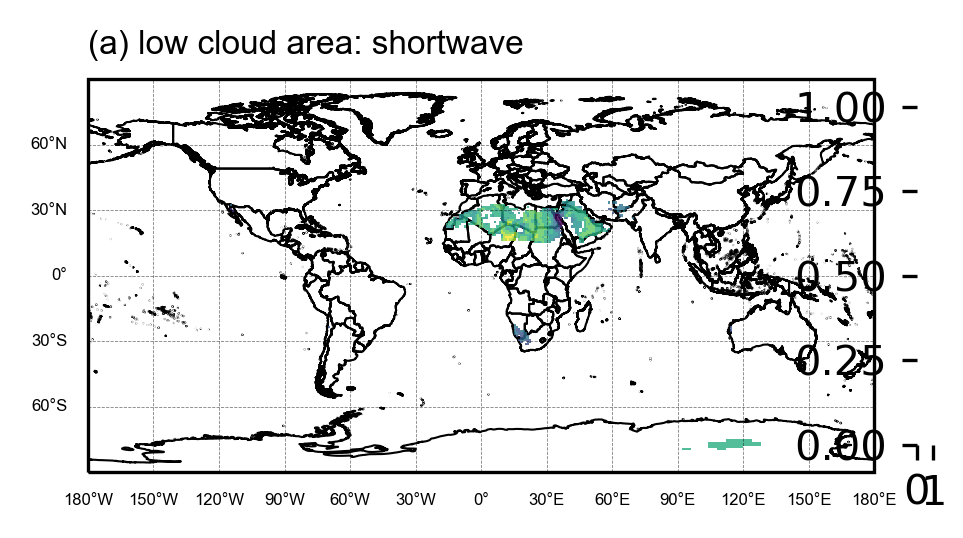

In [20]:
fig = plt.figure(figsize=(8,4),dpi=300)
ax1 = fig.add_subplot(221,projection = ccrs.PlateCarree())
ax1.add_feature(world, linewidth=0.5, zorder=1)
p1 = low_cldarea_sw.plot(x='lon', y='lat', transform = ccrs.PlateCarree(),alpha=0.8, add_colorbar=False,levels=10)
gridline(ax1, low_cldarea_sw, 'lon', 'lat', 4, 0.2)
ax1.set_title('(a) low cloud area: shortwave', fontdict={'size': 8,'family':'Arial'},loc='left')
cb1 = plt.colorbar(p1,fraction=0.02)
cb1.ax.tick_params(labelsize=6, length=1.5,width=1)
cb1.set_label('Radiation (W m$^{-2}$)', fontdict={'family':'Arial', 'size': 6})

ax2 = fig.add_subplot(222,projection = ccrs.PlateCarree())
ax2.add_feature(world, linewidth=0.5, zorder=1)
p2 = high_cldarea_sw.plot(x='lon', y='lat', transform = ccrs.PlateCarree(),alpha=0.8, add_colorbar=False,levels=10)
gridline(ax2, high_cldarea_sw, 'lon', 'lat', 4, 0.2)
ax2.set_title('(b) high cloud area: shortwave', fontdict={'size': 8,'family':'Arial'},loc='left')
cb2 = plt.colorbar(p2,fraction=0.02)
cb2.ax.tick_params(labelsize=6, length=1.5,width=1)
cb2.set_label('Radiation (W m$^{-2}$)', fontdict={'family':'Arial', 'size': 6})

ax3 = fig.add_subplot(223,projection = ccrs.PlateCarree())
ax3.add_feature(world, linewidth=0.5, zorder=1)
p3 = low_cldarea_lw.plot(x='lon', y='lat', transform = ccrs.PlateCarree(),alpha=0.8, add_colorbar=False,levels=10)
gridline(ax3, low_cldarea_lw, 'lon', 'lat', 4, 0.2)
ax3.set_title('(c) low cloud area: longwave', fontdict={'size': 8,'family':'Arial'},loc='left')
cb3 = plt.colorbar(p3,fraction=0.02)
cb3.ax.tick_params(labelsize=6, length=1.5,width=1)
cb3.set_label('Radiation (W m$^{-2}$)', fontdict={'family':'Arial', 'size': 6})

ax4 = fig.add_subplot(224,projection = ccrs.PlateCarree())
ax4.add_feature(world, linewidth=0.5, zorder=1)
p4 = high_cldarea_lw.plot(x='lon', y='lat', transform = ccrs.PlateCarree(),alpha=0.8, add_colorbar=False,levels=10)
gridline(ax4, high_cldarea_lw, 'lon', 'lat', 4, 0.2)
ax4.set_title('(d) high cloud area: longwave', fontdict={'size': 8,'family':'Arial'},loc='left')
cb4 = plt.colorbar(p4,fraction=0.02)
cb4.ax.tick_params(labelsize=6, length=1.5,width=1)
cb4.set_label('Radiation (W m$^{-2}$)', fontdict={'family':'Arial', 'size': 6})

plt.subplots_adjust(hspace=0.2,wspace=0.2)

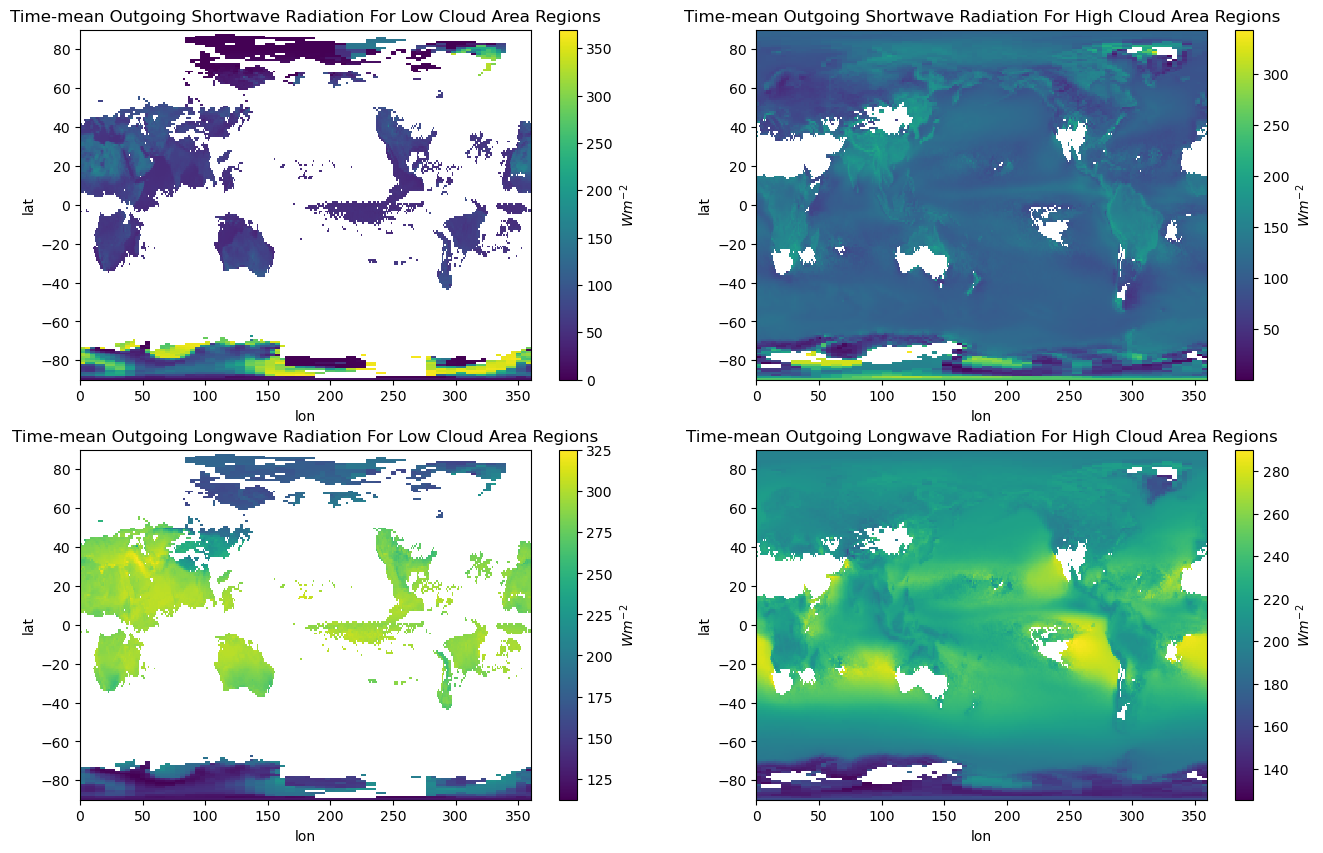

In [21]:
# 参考代码
lc_shortwave=ds2.toa_sw_all_mon.where(ds2.cldarea_total_daynight_mon<=25).mean(dim='time')
hc_shortwave=ds2.toa_sw_all_mon.where(ds2.cldarea_total_daynight_mon>=75).mean(dim='time')

lc_longwave=ds2.toa_lw_all_mon.where(ds2.cldarea_total_daynight_mon<=25).mean(dim='time')
hc_longwave=ds2.toa_lw_all_mon.where(ds2.cldarea_total_daynight_mon>=75).mean(dim='time')

fig,axs =plt.subplots(2,2,figsize=(16,10))
axs=axs.flatten()

fig1=lc_shortwave.plot(ax=axs[0],add_colorbar=False)
cb=plt.colorbar(fig1)
cb.set_label('${Wm^{-2}}$')
axs[0].set_title('Time-mean Outgoing Shortwave Radiation For Low Cloud Area Regions')

fig2=hc_shortwave.plot(ax=axs[1],add_colorbar=False)
cb=plt.colorbar(fig2)
cb.set_label('${Wm^{-2}}$')
axs[1].set_title('Time-mean Outgoing Shortwave Radiation For High Cloud Area Regions')

fig3=lc_longwave.plot(ax=axs[2],add_colorbar=False)
cb=plt.colorbar(fig3)
cb.set_label('${Wm^{-2}}$')
axs[2].set_title('Time-mean Outgoing Longwave Radiation For Low Cloud Area Regions')

fig4=hc_longwave.plot(ax=axs[3],add_colorbar=False)
cb=plt.colorbar(fig4)
cb.set_label('${Wm^{-2}}$')
axs[3].set_title('Time-mean Outgoing Longwave Radiation For High Cloud Area Regions')

plt.show()

## 2.5

In [22]:
weights = np.cos(np.deg2rad(ds2.lat))
weights.name = "weights"
low_cldarea_sw_mean = low_cldarea_sw.weighted(weights).mean(('lon','lat'))
high_cldarea_sw_mean = high_cldarea_sw.weighted(weights).mean(('lon','lat'))
low_cldarea_lw_mean = low_cldarea_lw.weighted(weights).mean(('lon','lat'))
high_cldarea_lw_mean = high_cldarea_lw.weighted(weights).mean(('lon','lat'))
print(low_cldarea_sw_mean.data,high_cldarea_sw_mean.data)
print(low_cldarea_lw_mean.data,high_cldarea_lw_mean.data)

122.5522 109.20795
280.6622 223.76877


The clouds overall decrease outgoing shortwave and longwave radiation. The clouds absorb radiation.

In [23]:
# 参考代码
weights1 = np.cos(np.deg2rad(lc_shortwave.lat))
lc_mean_shortwave=lc_shortwave.weighted(weights1).mean()
hc_mean_shortwave=hc_shortwave.weighted(weights1).mean()
lc_mean_longwave=lc_longwave.weighted(weights1).mean()
hc_mean_longwave=hc_longwave.weighted(weights1).mean()
print(f'The global mean values of shortwave radiation in high and low cloud regions are {hc_mean_shortwave:f} and {lc_mean_shortwave:f} Wm-2 respectively.')
print(f'The global mean values of longwave radiation in high and low cloud regions are {hc_mean_longwave:f} and {lc_mean_longwave:f} Wm-2 respectively.')
print('In high cloud area regions, shortwave radiation is stronger while longwave radiation is weaker, which means clouds would reflect shortwave and reserve longwave.')

The global mean values of shortwave radiation in high and low cloud regions are 113.157120 and 75.494324 Wm-2 respectively.
The global mean values of longwave radiation in high and low cloud regions are 225.708435 and 270.853027 Wm-2 respectively.
In high cloud area regions, shortwave radiation is stronger while longwave radiation is weaker, which means clouds would reflect shortwave and reserve longwave.


# PS3. Explore a netCDF dataset
9/10  
1. 绘制某个变量的时间序列，注意去掉月尺度的季节性周期。——图片缺少图名。4.5/5
2. 用该数据集绘制至少5种不同的图。——部分图片缺少图名。4.5/5

Dataset: CRU TS v4.07 temperature 2011-2020

In [30]:
ds3 = xr.open_dataset('cru_ts4.07.2011.2020.tmp.dat.nc')
ds3

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 120)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 2011-01-16 2011-02-15 ... 2020-12-16
Data variables:
    tmp      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.07 Mean Temperature
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2304141047. Data generated from:tmp.2304141039.dtb
    history:      Fri 14 Apr 11:30:51 BST 2023 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

## 3.1

In [31]:
weights = np.cos(np.deg2rad(ds3.lat))
weights.name = "weights"
ds3_mean = ds3['tmp'].weighted(weights).mean(('lon','lat'))
#remove monthly seasonal cycle
ds3_clim_mm = ds3_mean.groupby(ds3.time.dt.month).mean()
ds3_ano = xr.zeros_like(ds3_mean)
for i in range(0,len(ds3_mean)):
    k = i % 12
    ds3_ano[i] = ds3_mean.values[i] - ds3_clim_mm.values[k]

Text(0.5, 0, 'year')

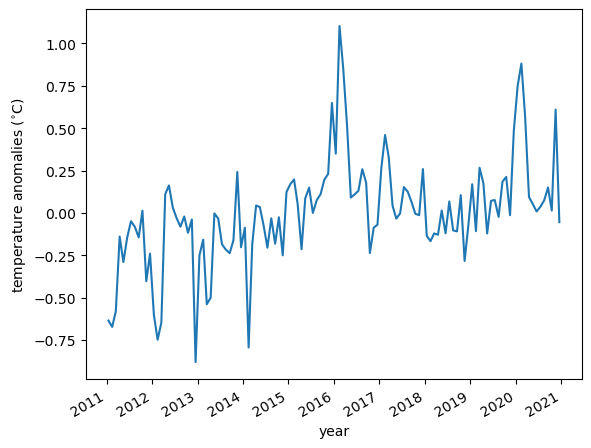

In [32]:
ds3_ano.plot()
plt.ylabel('temperature anomalies ($^{\circ}$C)')
plt.xlabel('year')

## 3.2

In [33]:
temp = ds3['tmp']
temp = temp.resample(time='1Y').mean()
trend = xr.zeros_like(temp[0])
for ii in range(0,trend.shape[0]):
    for jj in range(0,trend.shape[1]):
        series = temp[:,ii,jj]
        trend[ii,jj] = stats.linregress(np.arange(0,10),series)[0]

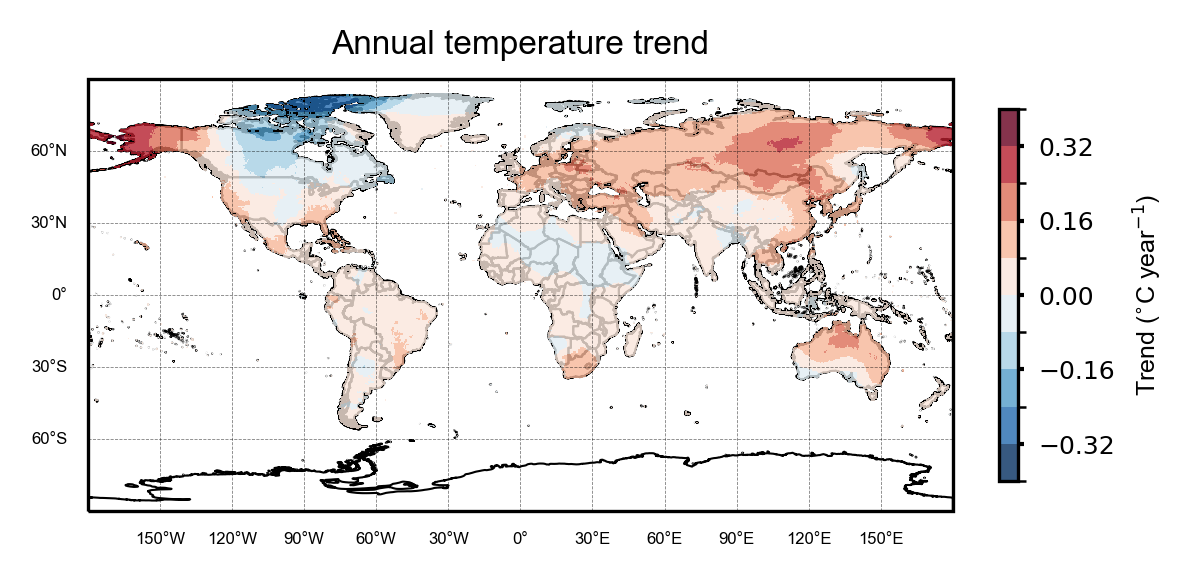

In [34]:
fig = plt.figure(figsize=(4,2),dpi=300)
ax1 = fig.add_subplot(111,projection = ccrs.PlateCarree())
ax1.add_feature(world, linewidth=0.5, zorder=1)
p1 = trend.plot(x='lon', y='lat', transform = ccrs.PlateCarree(),alpha=0.8, add_colorbar=False,levels=10)
gridline(ax1, low_cldarea_sw, 'lon', 'lat', 4, 0.2)
ax1.set_title('Annual temperature trend', fontdict={'size': 8,'family':'Arial'})
cb1 = plt.colorbar(p1,fraction=0.02)
cb1.ax.tick_params(labelsize=6, length=1.5,width=1)
cb1.set_label('Trend ($^{\circ}$C year$^{-1}$)', fontdict={'family':'Arial', 'size': 6})

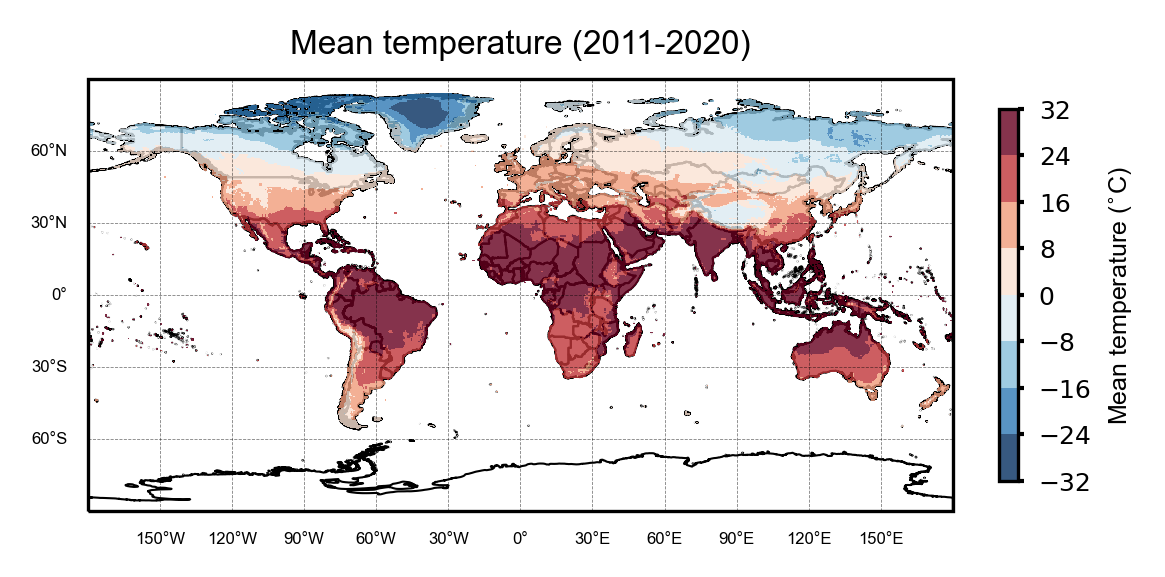

In [35]:
fig = plt.figure(figsize=(4,2),dpi=300)
ax1 = fig.add_subplot(111,projection = ccrs.PlateCarree())
ax1.add_feature(world, linewidth=0.5, zorder=1)
p1 = temp.mean('time').plot(x='lon', y='lat', transform = ccrs.PlateCarree(),alpha=0.8, add_colorbar=False,levels=10)
gridline(ax1, low_cldarea_sw, 'lon', 'lat', 4, 0.2)
ax1.set_title('Mean temperature (2011-2020)', fontdict={'size': 8,'family':'Arial'})
cb1 = plt.colorbar(p1,fraction=0.02)
cb1.ax.tick_params(labelsize=6, length=1.5,width=1)
cb1.set_label('Mean temperature ($^{\circ}$C)', fontdict={'family':'Arial', 'size': 6})

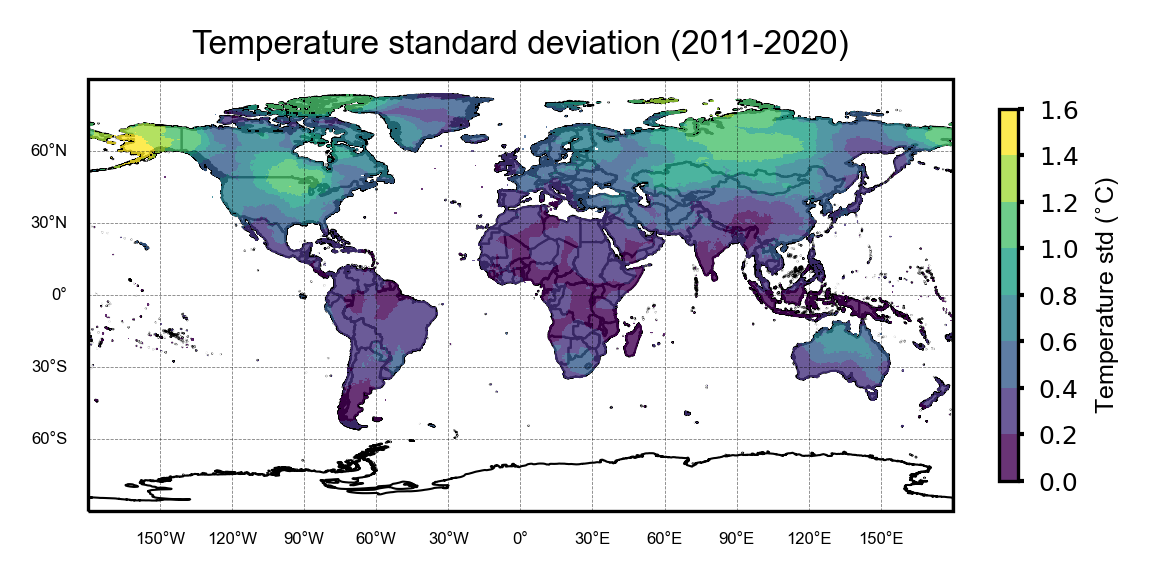

In [36]:
fig = plt.figure(figsize=(4,2),dpi=300)
ax1 = fig.add_subplot(111,projection = ccrs.PlateCarree())
ax1.add_feature(world, linewidth=0.5, zorder=1)
p1 = temp.std('time').plot(x='lon', y='lat', transform = ccrs.PlateCarree(),alpha=0.8, add_colorbar=False,levels=10)
gridline(ax1, low_cldarea_sw, 'lon', 'lat', 4, 0.2)
ax1.set_title('Temperature standard deviation (2011-2020)', fontdict={'size': 8,'family':'Arial'})
cb1 = plt.colorbar(p1,fraction=0.02)
cb1.ax.tick_params(labelsize=6, length=1.5,width=1)
cb1.set_label('Temperature std ($^{\circ}$C)', fontdict={'family':'Arial', 'size': 6})

([<matplotlib.axis.XTick at 0x164655503d0>,
 [Text(-75, 0, '-75$^{\\circ}$'),
  Text(-50, 0, '-50$^{\\circ}$'),
  Text(-25, 0, '-25$^{\\circ}$'),
  Text(0, 0, '0$^{\\circ}$'),
  Text(25, 0, '25$^{\\circ}$'),
  Text(50, 0, '50$^{\\circ}$'),
  Text(75, 0, '75$^{\\circ}$')])

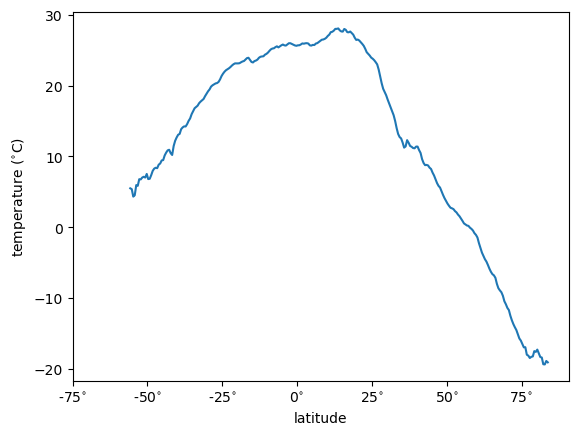

In [37]:
#latitude mean
lat_temp = temp.mean(('lon','time'))
lat_temp.plot()
plt.ylabel('temperature ($^{\circ}$C)')
plt.xlabel('latitude')
plt.xticks([-75,-50,-25,0,25,50,75],['-75$^{\circ}$','-50$^{\circ}$','-25$^{\circ}$','0$^{\circ}$','25$^{\circ}$','50$^{\circ}$','75$^{\circ}$'])

([<matplotlib.axis.XTick at 0x16465507b50>,
 [Text(-150, 0, '-150$^{\\circ}$'),
  Text(-100, 0, '-100$^{\\circ}$'),
  Text(-50, 0, '-50$^{\\circ}$'),
  Text(0, 0, '0$^{\\circ}$'),
  Text(50, 0, '50$^{\\circ}$'),
  Text(100, 0, '100$^{\\circ}$'),
  Text(150, 0, '150$^{\\circ}$')])

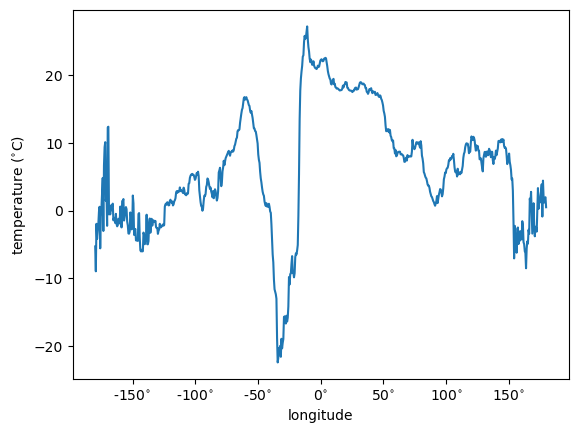

In [38]:
#longitude mean
lon_temp = temp.mean(('lat','time'))
lon_temp.plot()
plt.ylabel('temperature ($^{\circ}$C)')
plt.xlabel('longitude')
plt.xticks([-150,-100,-50,0,50,100,150],['-150$^{\circ}$','-100$^{\circ}$','-50$^{\circ}$','0$^{\circ}$','50$^{\circ}$','100$^{\circ}$','150$^{\circ}$'])